In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

np.random.seed(42)

In [2]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [12]:
# Create dataframe with all control records
control_df = df.query("group == 'control'")

# Compute completion rate (This means we are looking for the mean)
control_ctr = control_df['completed'].mean()

# Display completion rate
control_ctr

0.37199519230769229

In [13]:
# Create dataframe with all experiment records
experiment_df = df.query("group == 'experiment'")

# Compute completion rate
experiment_ctr = experiment_df['completed'].mean()

# Display completion rate
experiment_ctr

0.39353348729792148

In [14]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [35]:
# Create sampling distribution for difference in completion rates
# with boostrapping (rates need means as the sample part)
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    e_samp = b_samp.query("group == 'experiment'")
    e_ctr = e_samp['completed'].mean()
    c_samp = b_samp.query("group == 'control'")
    c_ctr = c_samp['completed'].mean()
    diffs.append(e_ctr - c_ctr)

In [36]:
# convert to numpy array
diffs = np.array(diffs)

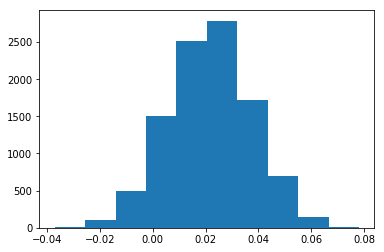

In [37]:
# plot distribution
plt.hist(diffs);

In [38]:
# create distribution under the null hypothesis 
#in the null we need to use the standard deviation of the bootstrap sample
#as well as the size of that distrubution
null_vals = np.random.normal(0, diffs.std(), diffs.size)

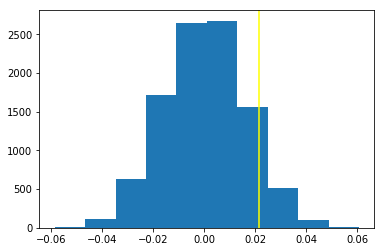

In [39]:
# plot null distribution
plt.hist(null_vals);
plt.axvline(x=obs_diff, color='yellow');

# plot line for observed statistic


In [40]:
# compute p value p value is likelyhoood
#the observed value came from this dataset
(null_vals > obs_diff).mean()

0.094899999999999998